## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [7]:
"""
Compile 模型
"""

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 110us/step - loss: 2.0860 - accuracy: 0.2585 - val_loss: 1.9740 - val_accuracy: 0.2888
Epoch 2/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.8955 - accuracy: 0.3304 - val_loss: 1.8433 - val_accuracy: 0.3507
Epoch 3/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.8243 - accuracy: 0.3572 - val_loss: 1.8338 - val_accuracy: 0.3332
Epoch 4/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.7787 - accuracy: 0.3733 - val_loss: 1.7626 - val_accuracy: 0.3735
Epoch 5/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.7427 - accuracy: 0.3880 - val_loss: 1.7568 - val_accuracy: 0.3778
Epoch 6/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.7122 - accuracy: 0.3964 - val_loss: 1.7452 - val_accuracy: 0.3848
Epoch 7/500
50000/50000 [==============================] - 5s

50000/50000 [==============================] - 5s 104us/step - loss: 1.2057 - accuracy: 0.5761 - val_loss: 1.3533 - val_accuracy: 0.5157
Epoch 56/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.1949 - accuracy: 0.5800 - val_loss: 1.5831 - val_accuracy: 0.4658
Epoch 57/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1871 - accuracy: 0.5837 - val_loss: 1.4320 - val_accuracy: 0.4940
Epoch 58/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1783 - accuracy: 0.5871 - val_loss: 1.3954 - val_accuracy: 0.4992
Epoch 59/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.1766 - accuracy: 0.5893 - val_loss: 1.3853 - val_accuracy: 0.5069
Epoch 60/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.1694 - accuracy: 0.5908 - val_loss: 1.5123 - val_accuracy: 0.4642
Epoch 61/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1597 - accuracy: 0.5941 - val_los

Epoch 110/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8978 - accuracy: 0.6875 - val_loss: 1.5262 - val_accuracy: 0.4921
Epoch 111/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.8942 - accuracy: 0.6901 - val_loss: 1.4906 - val_accuracy: 0.4995
Epoch 112/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.8962 - accuracy: 0.6885 - val_loss: 1.3262 - val_accuracy: 0.5374
Epoch 113/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.8855 - accuracy: 0.6944 - val_loss: 1.6079 - val_accuracy: 0.4846
Epoch 114/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.8867 - accuracy: 0.6937 - val_loss: 1.5725 - val_accuracy: 0.4928
Epoch 115/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.8806 - accuracy: 0.6963 - val_loss: 1.3863 - val_accuracy: 0.5275
Epoch 116/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.8709 - accuracy:

50000/50000 [==============================] - 4s 87us/step - loss: 0.6363 - accuracy: 0.7817 - val_loss: 1.5783 - val_accuracy: 0.5151
Epoch 165/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.6308 - accuracy: 0.7852 - val_loss: 1.5401 - val_accuracy: 0.5295
Epoch 166/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.6109 - accuracy: 0.7921 - val_loss: 1.6282 - val_accuracy: 0.5056
Epoch 167/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.6215 - accuracy: 0.7894 - val_loss: 1.7001 - val_accuracy: 0.5062
Epoch 168/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.6130 - accuracy: 0.7923 - val_loss: 1.7022 - val_accuracy: 0.5070
Epoch 169/500
50000/50000 [==============================] - 5s 93us/step - loss: 0.6210 - accuracy: 0.7886 - val_loss: 1.6861 - val_accuracy: 0.5070
Epoch 170/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.6107 - accuracy: 0.7906 - val_

50000/50000 [==============================] - 4s 89us/step - loss: 0.4111 - accuracy: 0.8694 - val_loss: 1.8587 - val_accuracy: 0.5153
Epoch 219/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.3987 - accuracy: 0.8737 - val_loss: 1.9966 - val_accuracy: 0.5100
Epoch 220/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.3741 - accuracy: 0.8797 - val_loss: 1.8487 - val_accuracy: 0.5237
Epoch 221/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.3903 - accuracy: 0.8750 - val_loss: 1.8330 - val_accuracy: 0.5226
Epoch 222/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.3828 - accuracy: 0.8779 - val_loss: 2.3671 - val_accuracy: 0.4711
Epoch 223/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.3861 - accuracy: 0.8744 - val_loss: 1.7223 - val_accuracy: 0.5461
Epoch 224/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.3772 - accuracy: 0.8793 - val

50000/50000 [==============================] - 5s 99us/step - loss: 0.2741 - accuracy: 0.9227 - val_loss: 2.1113 - val_accuracy: 0.5389
Epoch 273/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.1768 - accuracy: 0.9520 - val_loss: 2.8872 - val_accuracy: 0.4672
Epoch 274/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2436 - accuracy: 0.9354 - val_loss: 2.2440 - val_accuracy: 0.5180
Epoch 275/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2128 - accuracy: 0.9433 - val_loss: 2.0933 - val_accuracy: 0.5409
Epoch 276/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.1950 - accuracy: 0.9471 - val_loss: 2.0563 - val_accuracy: 0.5420
Epoch 277/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.2175 - accuracy: 0.9405 - val_loss: 2.4567 - val_accuracy: 0.5012
Epoch 278/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.2493 - accuracy: 0.9292 - val_

Epoch 327/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.1285 - accuracy: 0.9695 - val_loss: 2.3308 - val_accuracy: 0.5239
Epoch 328/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.2420 - accuracy: 0.9348 - val_loss: 2.3332 - val_accuracy: 0.5278
Epoch 329/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.1815 - accuracy: 0.9519 - val_loss: 2.2518 - val_accuracy: 0.5340
Epoch 330/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.1023 - accuracy: 0.9797 - val_loss: 2.2600 - val_accuracy: 0.5344
Epoch 331/500
50000/50000 [==============================] - 4s 90us/step - loss: 0.1563 - accuracy: 0.9630 - val_loss: 2.2778 - val_accuracy: 0.5373
Epoch 332/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.1810 - accuracy: 0.9563 - val_loss: 2.2039 - val_accuracy: 0.5279
Epoch 333/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.1037 - accuracy:

50000/50000 [==============================] - 5s 103us/step - loss: 0.3808 - accuracy: 0.8756 - val_loss: 2.3806 - val_accuracy: 0.5244
Epoch 382/500
50000/50000 [==============================] - 5s 96us/step - loss: 0.2200 - accuracy: 0.9333 - val_loss: 2.4558 - val_accuracy: 0.5330
Epoch 383/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.2105 - accuracy: 0.9411 - val_loss: 2.3312 - val_accuracy: 0.5279
Epoch 384/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.1440 - accuracy: 0.9682 - val_loss: 2.3338 - val_accuracy: 0.5125
Epoch 385/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.1683 - accuracy: 0.9560 - val_loss: 2.4887 - val_accuracy: 0.5288
Epoch 386/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.1219 - accuracy: 0.9719 - val_loss: 2.4908 - val_accuracy: 0.5336
Epoch 387/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0606 - accuracy: 0.9919 - va

50000/50000 [==============================] - 5s 101us/step - loss: 0.0180 - accuracy: 0.9994 - val_loss: 2.8580 - val_accuracy: 0.5421
Epoch 436/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0175 - accuracy: 0.9992 - val_loss: 2.8755 - val_accuracy: 0.5383
Epoch 437/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0173 - accuracy: 0.9992 - val_loss: 2.8839 - val_accuracy: 0.5381
Epoch 438/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0173 - accuracy: 0.9992 - val_loss: 2.9063 - val_accuracy: 0.5395
Epoch 439/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0169 - accuracy: 0.9992 - val_loss: 2.8942 - val_accuracy: 0.5382
Epoch 440/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0163 - accuracy: 0.9993 - val_loss: 2.9004 - val_accuracy: 0.5335
Epoch 441/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0162 - accuracy: 0.9993 

50000/50000 [==============================] - 5s 99us/step - loss: 0.0087 - accuracy: 0.9999 - val_loss: 3.1622 - val_accuracy: 0.5398
Epoch 490/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0087 - accuracy: 0.9999 - val_loss: 3.1501 - val_accuracy: 0.5426
Epoch 491/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0085 - accuracy: 0.9999 - val_loss: 3.1721 - val_accuracy: 0.5413
Epoch 492/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0085 - accuracy: 0.9999 - val_loss: 3.1631 - val_accuracy: 0.5389
Epoch 493/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 3.1727 - val_accuracy: 0.5399
Epoch 494/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0083 - accuracy: 0.9999 - val_loss: 3.1907 - val_accuracy: 0.5357
Epoch 495/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0083 - accuracy: 0.9999 - 

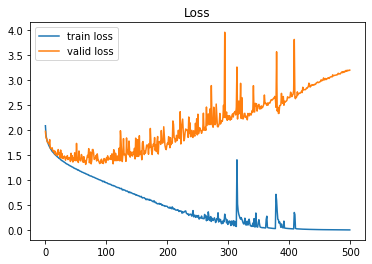

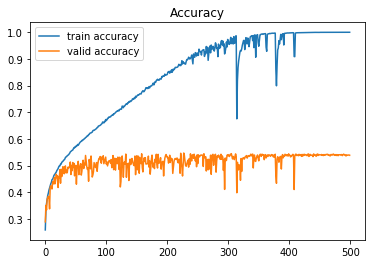

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()